In [1]:
from netCDF4 import Dataset
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
os.chdir(r"C:\Users\Pranjali\Downloads")
climate = xr.open_dataset("Climate.nc")
ppt = xr.open_dataset("b.e11.BRCP85C5CNBDRD.f09_g16.002.cam.h1.PRECT.20060101-20801231_India.nc")
c = climate['precipitation1'].sel(time= slice('1930-01-01','2005-12-31'))
p = ppt['PRECT'].sel( time =slice("2006-01-01","2050-12-31") )

In [2]:
p

<xarray.DataArray 'PRECT' (time: 16425, lat: 38, lon: 49)>
[30583350 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 4.241 5.183 6.126 7.068 ... 36.28 37.23 38.17 39.11
  * lon      (lon) float64 60.0 61.25 62.5 63.75 ... 116.2 117.5 118.8 120.0
  * time     (time) object 2006-01-01 00:00:00 ... 2050-12-31 00:00:00
Attributes:
    units:         m/s
    long_name:     Total (convective and large-scale) precipitation rate (liq...
    cell_methods:  time: mean

In [3]:
p1=p*1000*(60*60*24)

masker=climate['precipitation1'][1,:,:]
mask=xr.where(masker>=0,1,np.nan)


In [4]:
p1

<xarray.DataArray 'PRECT' (time: 16425, lat: 38, lon: 49)>
array([[[2.772728e+01, 2.108367e+01, ..., 1.922956e-01, 1.406259e-09],
        [1.342822e+01, 1.128502e+01, ..., 3.665024e+00, 4.936366e+00],
        ...,
        [5.211242e-01, 4.266553e-06, ..., 1.125966e-03, 3.780856e-04],
        [4.863378e-02, 6.124325e-07, ..., 9.449244e-07, 2.432303e-07]],

       [[2.458305e+01, 1.885774e+01, ..., 3.069202e+00, 2.931118e+00],
        [2.395143e+01, 1.777354e+01, ..., 4.779208e+00, 4.348074e+00],
        ...,
        [4.429573e-01, 9.487839e-02, ..., 7.794487e-01, 4.281945e-01],
        [7.297182e-03, 1.265350e-02, ..., 3.491239e-01, 2.622085e-01]],

       ...,

       [[5.635103e+00, 2.533266e+00, ..., 1.486029e+01, 9.703533e+00],
        [7.816138e+00, 5.381279e+00, ..., 1.341534e+01, 7.721362e+00],
        ...,
        [4.286782e-03, 7.194333e-03, ..., 5.479092e-06, 2.254068e-01],
        [9.096276e-03, 1.836833e-02, ..., 5.872263e-08, 8.682380e-02]],

       [[2.947856e+00, 2.118974

In [33]:
fut = (ppt.sel( time = "2020-10-04"))

In [40]:
fut['PRECT']*mask

<xarray.DataArray (time: 1, lat: 0, lon: 27)>
array([], shape=(1, 0, 27), dtype=float64)
Coordinates:
  * lat      (lat) float64 
  * lon      (lon) float64 67.5 68.75 70.0 71.25 72.5 ... 96.25 97.5 98.75 100.0
  * time     (time) object 2020-10-04 00:00:00

In [46]:
fut['PRECT']

<xarray.DataArray 'PRECT' (time: 1, lat: 38, lon: 49)>
array([[[5.635367e-08, 8.342244e-08, ..., 5.440901e-08, 4.524137e-08],
        [3.505551e-08, 7.346716e-08, ..., 4.694381e-08, 5.825242e-08],
        ...,
        [1.549612e-15, 4.690777e-16, ..., 7.228522e-10, 1.200618e-09],
        [1.319747e-13, 9.831140e-17, ..., 3.018916e-10, 4.286690e-10]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 4.241 5.183 6.126 7.068 ... 36.28 37.23 38.17 39.11
  * lon      (lon) float64 60.0 61.25 62.5 63.75 ... 116.2 117.5 118.8 120.0
  * time     (time) object 2020-10-04 00:00:00
Attributes:
    units:         m/s
    long_name:     Total (convective and large-scale) precipitation rate (liq...
    cell_methods:  time: mean

In [3]:
mask=mask.rename({'precipitation1','PRECT'})
ma=mask
ma

<xarray.DataArray {'precipitation1', 'PRECT'} (lat: 129, lon: 135)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time     datetime64[ns] 1901-01-02
  * lat      (lat) float32 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float32 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0

In [4]:
interpolated = p1.interp_like(mask)
interpolated

<xarray.DataArray 'PRECT' (time: 16425, lat: 129, lon: 135)>
array([[[5.096770e+00, 6.119820e+00, ..., 5.797085e-03, 2.937485e-03],
        [3.049556e+00, 3.816644e+00, ..., 9.668531e-03, 4.899190e-03],
        ...,
        [6.305124e-07, 6.834887e-07, ..., 1.045001e+00, 8.461111e-01],
        [4.502081e-07, 4.906333e-07, ..., 2.071499e+00, 2.089430e+00]],

       [[2.096828e+01, 2.041785e+01, ..., 9.175071e-01, 1.086418e+00],
        [1.647135e+01, 1.608498e+01, ..., 1.027649e+00, 1.235724e+00],
        ...,
        [2.470842e-02, 2.747400e-02, ..., 1.532345e+00, 1.727852e+00],
        [2.023173e-02, 2.368097e-02, ..., 1.561752e+00, 1.757310e+00]],

       ...,

       [[5.716877e+00, 5.659090e+00, ..., 3.031749e+01, 2.877602e+01],
        [6.709281e+00, 6.591805e+00, ..., 2.585123e+01, 2.412832e+01],
        ...,
        [1.356328e-02, 1.404985e-02, ..., 2.084151e-01, 1.921150e-01],
        [1.862873e-02, 2.514363e-02, ..., 4.422744e-01, 4.625368e-01]],

       [[3.442347e+00, 3.0898

In [5]:
masked = interpolated*mask
m=c.sel(time=~((c.time.dt.month == 2) & (c.time.dt.day == 29)))

In [9]:
from rpy2.robjects.packages import importr
utils = importr("utils")
extremes = importr("extRemes")
ismev = importr("ismev")
eva = importr("eva")
gnFit = importr("gnFit")
import time
from datetime import datetime
from matplotlib.offsetbox import AnchoredText
from netCDF4 import num2date, date2num
statis = importr('stats')
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

In [14]:
maxima1 = masked.groupby('time.year').max('time')
import pandas as pd

In [13]:
lon1=[]
lat1=[]
rlv1=[]
paramlist1=[]
for i in range(129):
    for j in range(135):

        maxima11 = maxima1.sel(lat=climate.lat[i],lon=climate.lon[j])
        params1 = {}    
        if(maxima11.values[1]>0):
            #RL2 = []
            block_maxima=maxima11.values[~np.isnan(maxima11.values)]
            try:
                gev_fit =  eva.gevrFit(block_maxima)
            except:
                pass
            MLE_est = list(gev_fit.rx2('par.ests'))

            #print(block_maxima)


            params1['location'] = MLE_est[0]

            params1['scale'] =  MLE_est[1] 

            params1['shape'] = MLE_est[2]

            if MLE_est[1]<0:
                MLE_est[1] = 0.01

            y = eva.rgevr(10000, 1, loc = MLE_est[0], scale = MLE_est[1], shape = MLE_est[2])

            sig_test = statis.ks_test(block_maxima, y)

            params1['p_val'] = sig_test.rx2('p.value')[0]
            paramlist1.append(params1)

    #print(params)
  


            if params1['p_val']>0.05:

                temp = eva.gevrRl(gev_fit, 100, method = "delta")

                RL1 = temp.rx2('Estimate')[0]
#n['RLV2'][i][j] = RL2

            else:
                params1['p_val'] = np.nan
                params1['location'] = np.nan
                params1['scale'] = np.nan
                params1['shape'] = np.nan
            #print(RL2,climate.lat.values[i],climate.lon.values[j])
            rlv1.append(RL1)
            lat1.append(climate.lat.values[i])
            lon1.append(climate.lon.values[j])
#n['RLV2'][i][j] = np.nan
#print(RL2)
        else:
            params1['p_val'] = np.nan
            params1['location'] = np.nan
            params1['scale'] = np.nan
            params1['shape'] = np.nan


NameError: name 'pd' is not defined

<xarray.Dataset>
Dimensions:  (lat1: 117, lon1: 118)
Coordinates:
  * lat1     (lat1) float64 8.25 8.5 8.75 9.0 9.25 ... 36.5 36.75 37.0 37.25
  * lon1     (lon1) float64 68.0 68.25 68.5 68.75 69.0 ... 96.5 96.75 97.0 97.25
Data variables:
    rlv1     (lat1, lon1) float64 nan nan nan nan nan ... nan nan nan nan nan


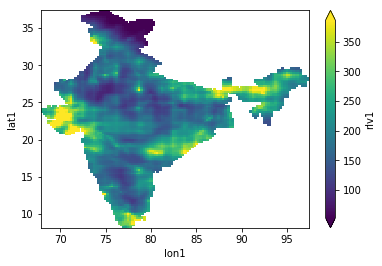

In [16]:
df = pd.DataFrame({'rlv1':rlv1,'lat1':lat1,'lon1':lon1})
ds= df.set_index(['lat1','lon1']).to_xarray()
print(ds)
ds['rlv1'].plot(robust=True)
plt.show()

In [18]:
masked.to_netcdf(path=r'C:\Users\Pranjali\Downloads\future.nc')

<xarray.DataArray (time: 16425, lat: 129, lon: 135)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) object 2006-01-01 00:00:00 ... 2050-12-31 00:00:00
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0